In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer, load_iris

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [4]:
data = pd.read_csv('./DataFiles/RegularSeasonDetailedResults.csv')

data = pd.DataFrame(data)

In [5]:
data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [6]:
games = []

for row in data.to_dict('records'):
    for perspective in ['W', 'L']:
        game = {}
        game['Won'] = int(perspective == 'W')
        if perspective == 'W':
            team_letter = 'W'
            opp_letter = 'L'
        else:
            team_letter = 'L'
            opp_letter = 'W'
        winner_location = row["WLoc"]
        if winner_location == ' A':
            loser_location = 'H'
        elif winner_location == 'H':
            loser_location = 'A'
        else:
            loser_location = 'N'
        row['LLoc'] = loser_location
        team_stats = [k for k,v in row.items() if k[0] == team_letter]
        opp_stats = [k for k,v in row.items() if k[0] == opp_letter]
    #     print(team_stats)
    #     print(opp_stats)

        for stat in team_stats:
            game_stat = 'Team' + stat[1:]
            game[game_stat] = row[stat]

        for stat in opp_stats:
            opp_stat = 'Opp' + stat[1:]
            game[opp_stat] = row[stat]

        for general_stat in ['DayNum', 'NumOT', 'Season']:
            game[general_stat] = row[general_stat]

        games.append(game)
    
games

[{'DayNum': 10,
  'NumOT': 0,
  'OppAst': 8,
  'OppBlk': 2,
  'OppDR': 22,
  'OppFGA': 53,
  'OppFGA3': 10,
  'OppFGM': 22,
  'OppFGM3': 2,
  'OppFTA': 22,
  'OppFTM': 16,
  'OppLoc': 'N',
  'OppOR': 10,
  'OppPF': 20,
  'OppScore': 62,
  'OppStl': 9,
  'OppTO': 18,
  'OppTeamID': 1328,
  'Season': 2003,
  'TeamAst': 13,
  'TeamBlk': 1,
  'TeamDR': 24,
  'TeamFGA': 58,
  'TeamFGA3': 14,
  'TeamFGM': 27,
  'TeamFGM3': 3,
  'TeamFTA': 18,
  'TeamFTM': 11,
  'TeamLoc': 'N',
  'TeamOR': 14,
  'TeamPF': 22,
  'TeamScore': 68,
  'TeamStl': 7,
  'TeamTO': 23,
  'TeamTeamID': 1104,
  'Won': 1},
 {'DayNum': 10,
  'NumOT': 0,
  'OppAst': 13,
  'OppBlk': 1,
  'OppDR': 24,
  'OppFGA': 58,
  'OppFGA3': 14,
  'OppFGM': 27,
  'OppFGM3': 3,
  'OppFTA': 18,
  'OppFTM': 11,
  'OppLoc': 'N',
  'OppOR': 14,
  'OppPF': 22,
  'OppScore': 68,
  'OppStl': 7,
  'OppTO': 23,
  'OppTeamID': 1104,
  'Season': 2003,
  'TeamAst': 8,
  'TeamBlk': 2,
  'TeamDR': 22,
  'TeamFGA': 53,
  'TeamFGA3': 10,
  'TeamFGM': 22,

In [8]:
data_df = pd.DataFrame(games)

In [10]:
data_df.head()

,DayNum,NumOT,OppAst,OppBlk,OppDR,OppFGA,OppFGA3,OppFGM,OppFGM3,OppFTA,...,TeamFTA,TeamFTM,TeamLoc,TeamOR,TeamPF,TeamScore,TeamStl,TeamTO,TeamTeamID,Won
0,10,0,8,2,22,53,10,22,2,22,...,18,11,N,14,22,68,7,23,1104,1
1,10,0,13,1,24,58,14,27,3,18,...,22,16,N,10,20,62,9,18,1328,0
2,10,0,7,6,25,67,24,24,6,20,...,19,10,N,15,18,70,4,13,1272,1
3,10,0,16,4,28,62,20,26,8,19,...,20,9,N,20,16,63,8,12,1393,0
4,11,0,9,5,22,73,26,22,3,23,...,29,17,N,17,25,73,5,10,1266,1


In [11]:
print(data.shape)
print(data_df.shape)

(76636, 34)
(153272, 36)


In [12]:
data_df.columns

Index(['DayNum', 'NumOT', 'OppAst', 'OppBlk', 'OppDR', 'OppFGA', 'OppFGA3',
       'OppFGM', 'OppFGM3', 'OppFTA', 'OppFTM', 'OppLoc', 'OppOR', 'OppPF',
       'OppScore', 'OppStl', 'OppTO', 'OppTeamID', 'Season', 'TeamAst',
       'TeamBlk', 'TeamDR', 'TeamFGA', 'TeamFGA3', 'TeamFGM', 'TeamFGM3',
       'TeamFTA', 'TeamFTM', 'TeamLoc', 'TeamOR', 'TeamPF', 'TeamScore',
       'TeamStl', 'TeamTO', 'TeamTeamID', 'Won'],
      dtype='object')

In [14]:
data.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [18]:
y = data_df['Won']
features  = ['DayNum', 'NumOT', 'OppAst', 'OppBlk', 'OppDR', 'OppFGA', 'OppFGA3',
       'OppFGM', 'OppFGM3', 'OppFTA', 'OppFTM', 'OppOR', 'OppPF','OppStl', 'OppTO','OppTeamID','TeamAst',
       'TeamBlk', 'TeamDR', 'TeamFGA', 'TeamFGA3', 'TeamFGM', 'TeamFGM3',
       'TeamFTA', 'TeamFTM', 'TeamOR', 'TeamPF','TeamStl', 'TeamTO', 'TeamTeamID']

X = data_df[features]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()

In [20]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [21]:
X_train_scaled.shape

(114954, 30)

In [22]:
model = Sequential()
model.add(Dense(30, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=35)

Train on 114954 samples, validate on 38318 samples
Epoch 1/35
114954/114954 [==============================] - 7s 61us/step - loss: 0.0562 - acc: 0.9772 - val_loss: 0.0107 - val_acc: 0.9959
Epoch 2/35
114954/114954 [==============================] - 7s 57us/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.0030 - val_acc: 0.9990
Epoch 3/35
114954/114954 [==============================] - 7s 57us/step - loss: 0.0042 - acc: 0.9988 - val_loss: 0.0025 - val_acc: 0.9991
Epoch 4/35
114954/114954 [==============================] - 7s 58us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 3.6545e-04 - val_acc: 0.9999
Epoch 5/35
114954/114954 [==============================] - 7s 59us/step - loss: 0.0033 - acc: 0.9991 - val_loss: 0.0032 - val_acc: 0.9991
Epoch 6/35
114954/114954 [==============================] - 7s 58us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 2.7152e-04 - val_acc: 0.9999
Epoch 7/35
114954/114954 [==============================] - 7s 59us/step - loss: 0.0019 - acc: 0.9995 - val

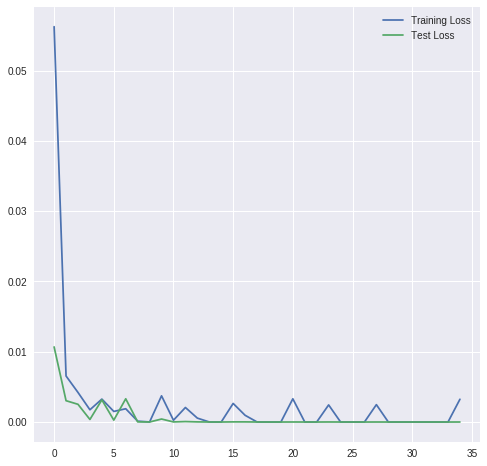

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(hist.history['loss'], label = 'Training Loss')
plt.plot(hist.history['val_loss'], label = 'Test Loss')
plt.legend()